In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock = pd.read_csv('../resources/ac.csv', index_col='time')
stock.head()

,open,low,close,volume
time,,,,
2014-01-02T08:00:00+08:00,520.0,519.0,525.5,367200.0
2014-01-03T08:00:00+08:00,521.0,514.0,520.5,552230.0
2014-01-06T08:00:00+08:00,525.0,519.0,525.5,399380.0
2014-01-07T08:00:00+08:00,529.5,523.0,524.0,197230.0
2014-01-08T08:00:00+08:00,524.0,524.0,530.5,558440.0


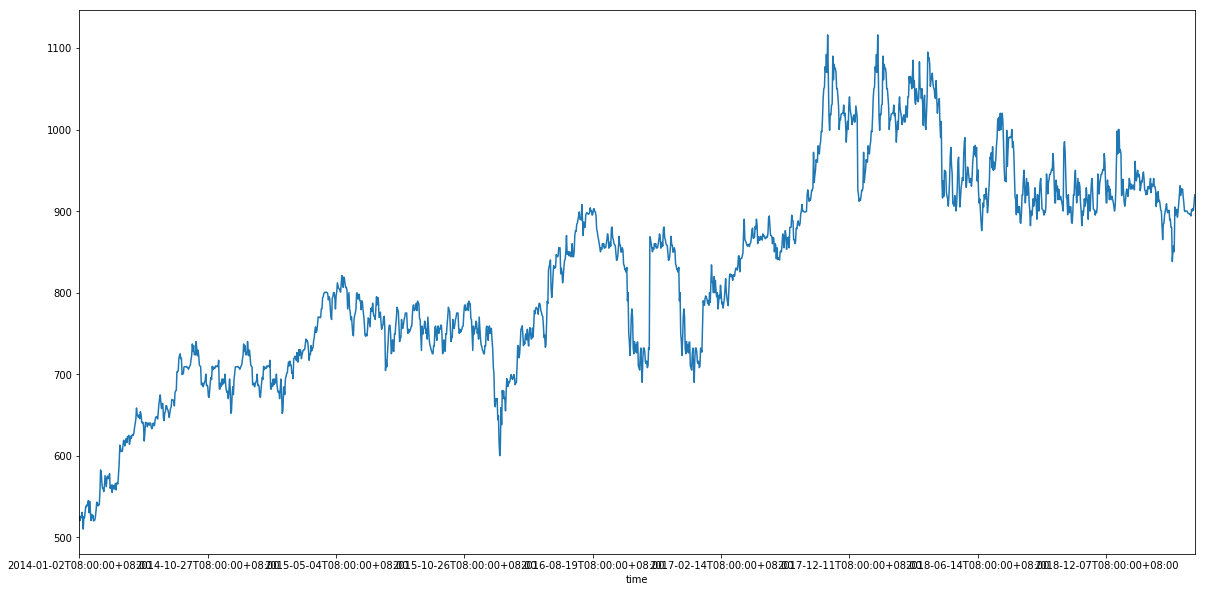

In [3]:
stock['close'].plot(figsize=(20, 10))

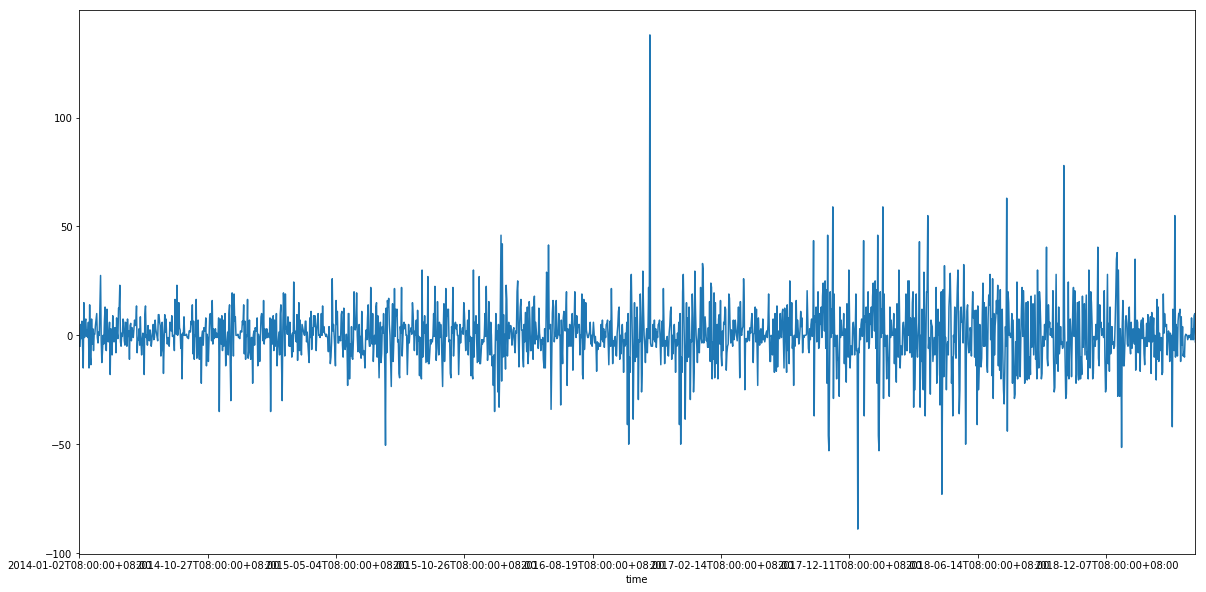

In [4]:
stock['difference'] = stock['close'] - stock['close'].shift(1)
stock['difference'].plot(figsize=(20, 10))

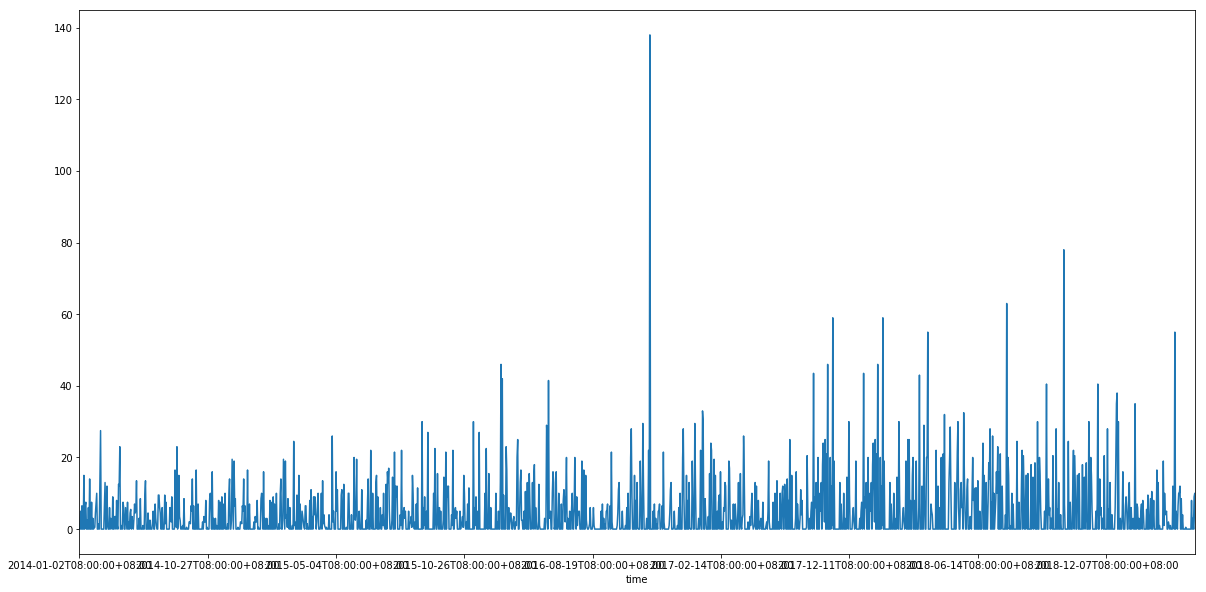

In [5]:
stock['gains'] = np.where(stock['difference'] > 0, stock['difference'], 0)
stock['gains'].plot(figsize=(20, 10))

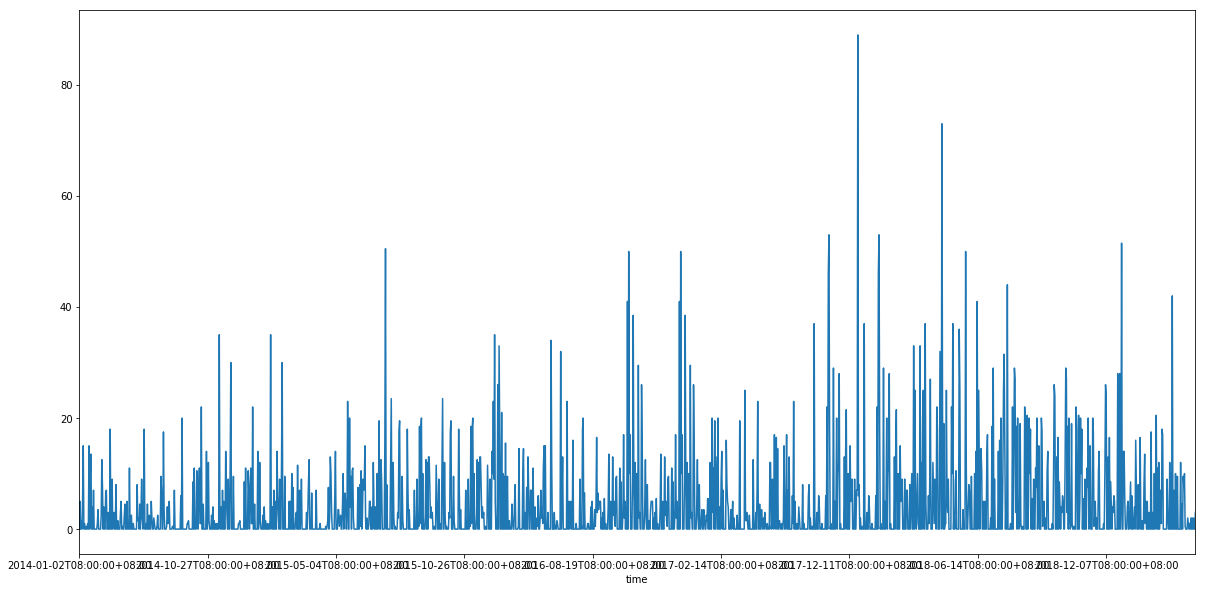

In [6]:
stock['losses'] = np.where(stock['difference'] < 0, np.abs(stock['difference']), 0)
stock['losses'].plot(figsize=(20, 10))

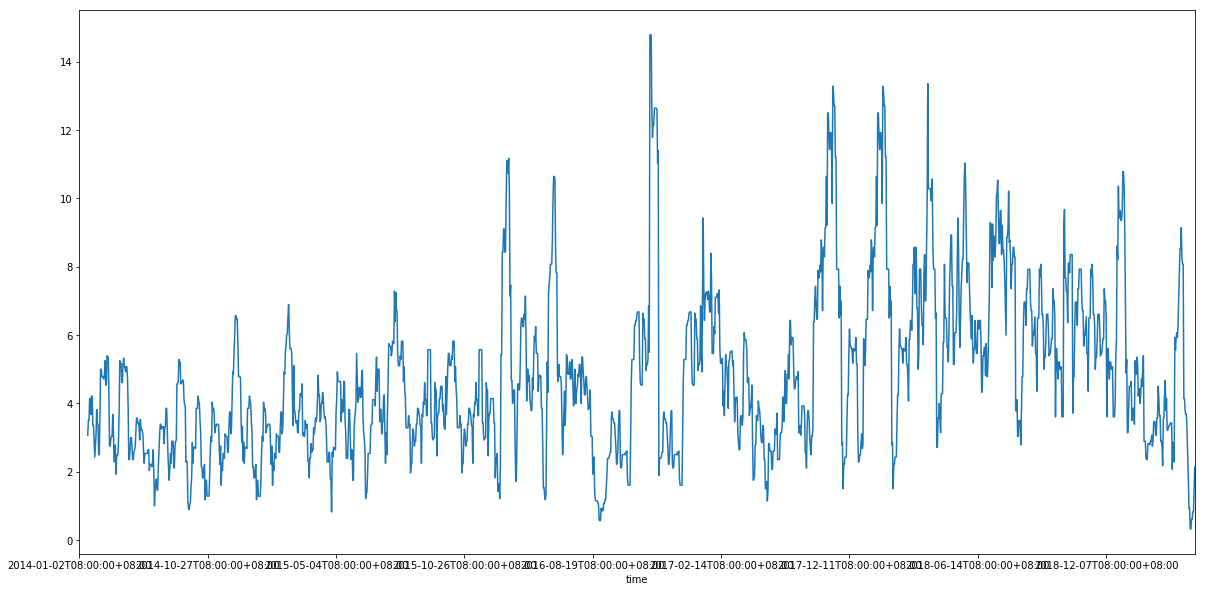

In [7]:
stock['avg. gains'] = stock['gains'].rolling(window=14).mean()
stock['avg. gains'].plot(figsize=(20, 10))

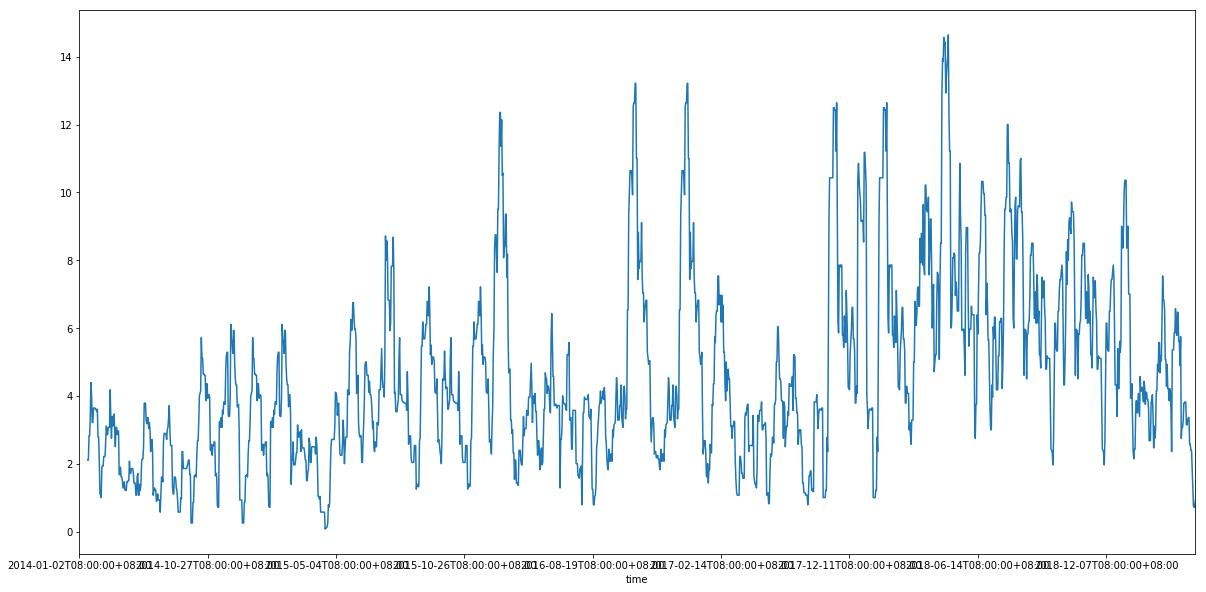

In [8]:
stock['avg. losses'] = stock['losses'].rolling(window=14).mean()
stock['avg. losses'].plot(figsize=(20, 10))

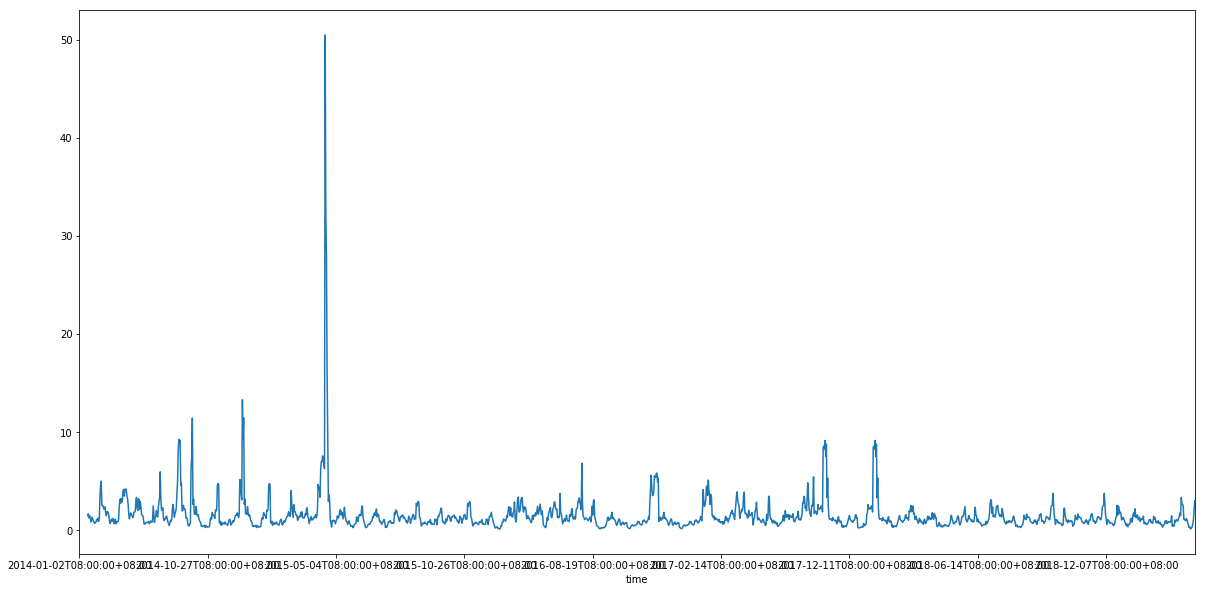

In [9]:
stock['relative strength'] = stock['avg. gains'] / stock['avg. losses']
stock['relative strength'].plot(figsize=(20, 10))

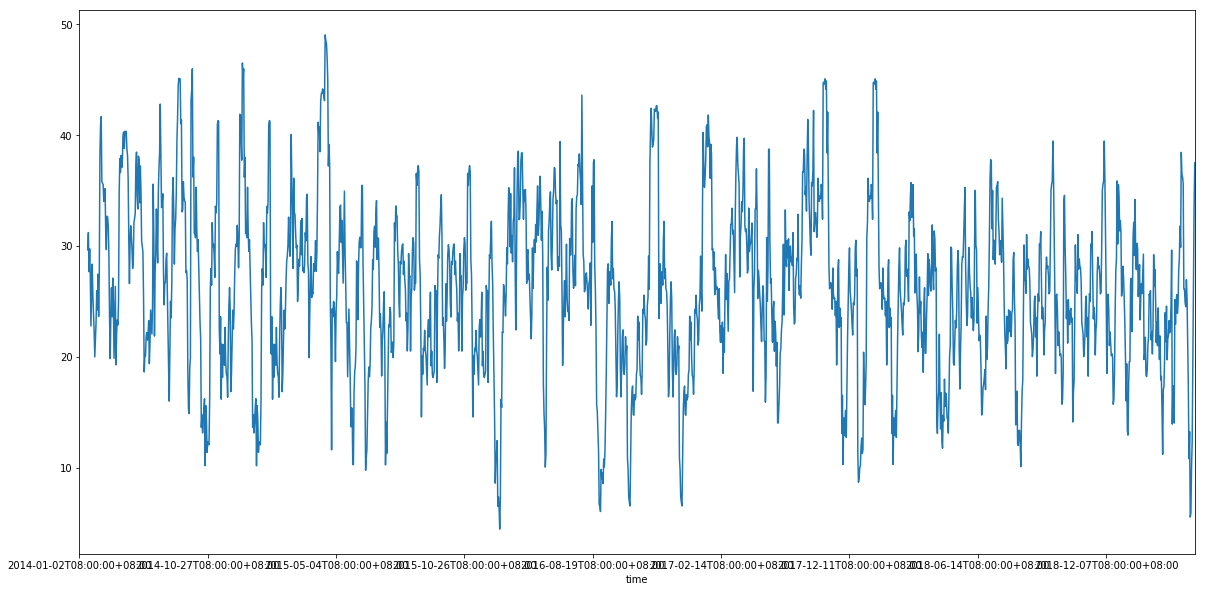

In [10]:
stock['relative strength index'] = 50 - (50 / (1 + stock['relative strength']))
stock['relative strength index'].plot(figsize=(20, 10))